# NGC4254

In [2]:
import numpy as np
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.io import fits
import astropy.units as u
from astropy.nddata import Cutout2D
from astropy.wcs.utils import pixel_to_skycoord, skycoord_to_pixel
import pylab as plt
from astropy.utils.data import get_pkg_data_filename
from IPython.display import Image
from scipy.optimize import curve_fit
from matplotlib.gridspec import GridSpec
import pandas as pd
from astroquery.ned import Ned
import matplotlib.patches as mpatches
from shapely.geometry import Point, LineString
from shapely.geometry.polygon import Polygon
import shapely
from astropy.modeling.models import Sersic1D
import scipy.interpolate as interpolate

In [3]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import matplotlib
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['PT Serif']})
rc('text', usetex=True)
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

In [3]:
Mpc=13 # https://arxiv.org/pdf/2410.13353

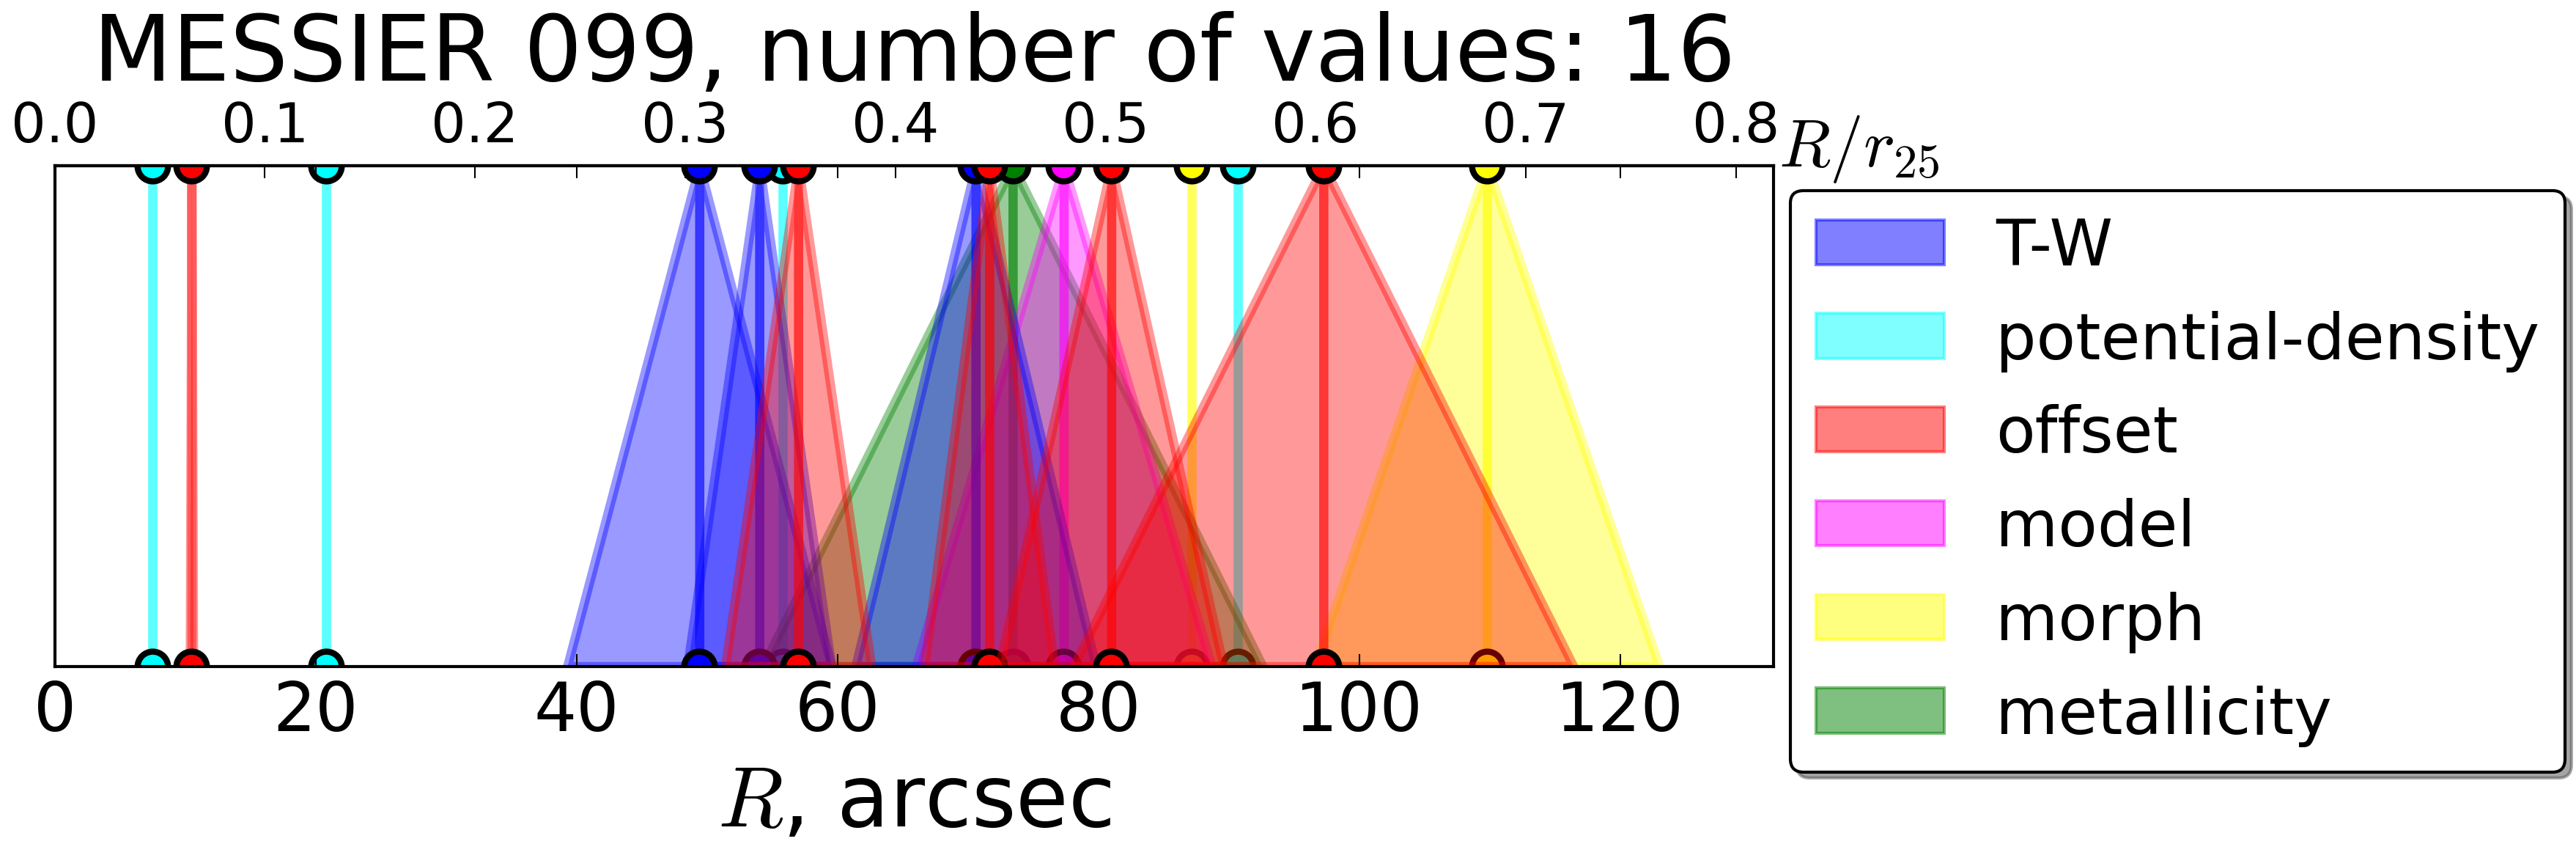

In [5]:
Image('./../CR_distributions/MESSIER 099.png', width=800)

In [ ]:
Mpc=13.1
scale = np.pi / (180 * 3600) * Mpc * 10**3
print(4.2/scale)

### measurements reliability

#### Spiral corotation

- Gonzalez & Graham (1996) --- *offset method*($10.5$ arcsec) 
**CHECK**

- Abdeen et al. (2020) --- *offset method* ($97.3 \pm 20$ and $71.6 \pm 5$ arcsec)

> The authors traced the spirals on images at different wavelength. They used two different scripts to trace arms. The fisrt one is PYTHON OL, it enables to generate a synthetic logarithmic spiral. ''Since the overlaying synthetic spiral traces are logarithmic,
if the actual spiral structure of the galaxy has intrinsic deviations from being logarithmic, the overlaying would not be accurate.''
The second one is Spirality (spiral arm-count-script), which is also fits logarithmic spiral, also it is capable of measuring the number of arms. These two measurements relate for different spiral tracing methods. Note, the reliability of them depends on whether those spirals are indeed logarithmic.
- Martinez-Garcia et al. (2008,2011) --- *offset method* ($81\pm8.6$ and $57\pm5.6$ arcsec)

> The authors investigated the color gradient and compared it with stellar population synthesis models. For NGC4254, they considered two regions from different arms, and found two different pattern speeds (and corotation radii, respectively) 33.5 and 47.7 km/s/kpc. As authors noted, `` Even though the $\Omega_p$ for region NGC 4254 B differs from the value obtained for region A, the spiral endpoint of the arm to which this region belongs matches the position of its OLR too!``

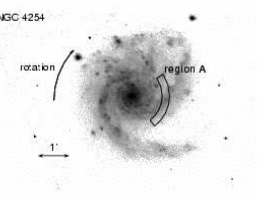
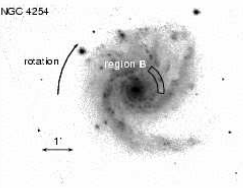

- Kranz et al. (2003) --- *model method* ($77\pm11$ arcsec (7.5 kpc))

> `` We model the gravitational potential from a mass map of the stellar distribution and a dark halo model. With the use of hydrodynamical gas simulations, we predict the gas velocity fields for different mpirical mass models of the sample galaxies, assembled from a variety of stellar disk and dark matter mass components. The two parameters that dominate the resulting forces in the disk are the stellar disk mass contribution and the pattern speed of the stellar spiral, Ωp. Thus, in this study we explore the effects of those parameters and compare the simulated gas morphology and velocity wiggles with our observations, enabling the identification of the best fitting scenario for each individual galaxy ``. The RCR’s were derived from comparing the spiral arm morphology with the gas morphology in hydrodynamical simulations of differing pattern speeds.

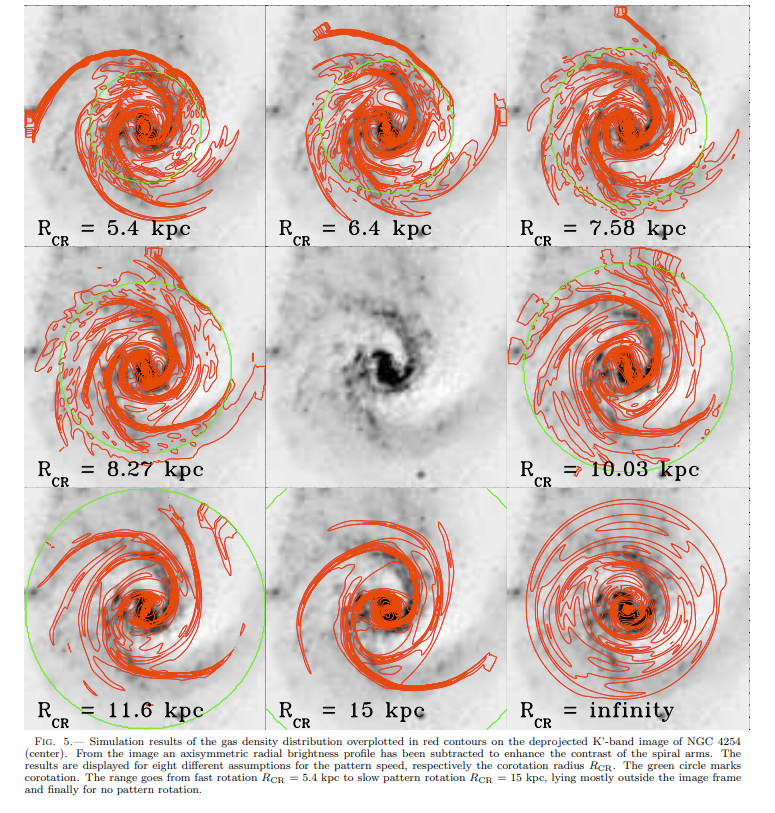
**See figure in Kranz et al.(2001)**

- Buta & Zhang (2009) --- *potential-density* ($7.5$,$21$,$56$ and $90$ arcsec)

> ``the phase-shift plot shows mostly weak P/N crossings. The one at r = 21 (0.12) is related to a small inner oval. The crossing at r = 56 (0.33) may be connected with the inner spiral arms, while that at r = 91 (0.54) could be connected with the outer arms. There is also a
nuclear crossing.``

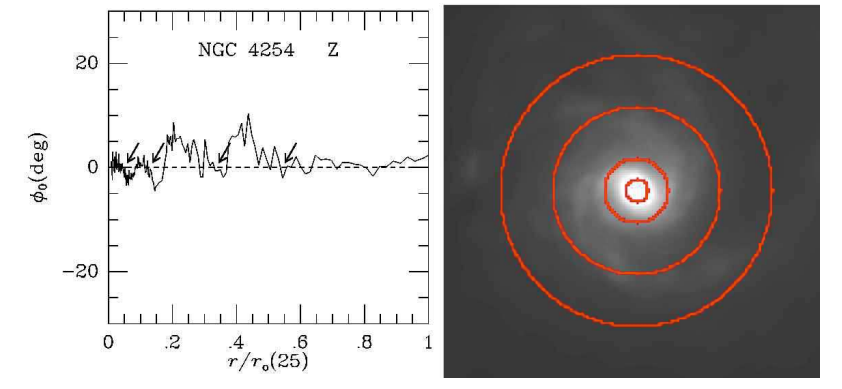

- Scarano & Lepine (2012) --- *metallicity method* ( $73.44\pm20$ arcsec)

> ``Since the results from different calibrations do agree with the presence of a break, but they do not agree with a specific position in
the radial oxygen distribution, this galaxy is represented as a weak point in our correlation.``

- Williams et al. (2021) --- *T-W method* ($49\pm10$ , $54\pm5.5$, $70\pm9$ arcsec)

> There are three measurements found using different velocity field data. Two of them esimated based on MUSE stellar and Halpha maps have quality flag 3 (``Poor fit: integral has not converged, points do not form a clear, well-defined slope;``), the patterm speed of them equal to 52 and 36 km/s/kpc. The corotation location found using ALMA data has a good linear regression and correspond to pattern speed 47.3 km/s/kpc.

- Elmegreen et al. (1992) --- *morphological method* ($87$ arcsec)

> The authors investigated the resonaces locations in galaxies with three arm using mophological features.(**m=3**)
(termination points of the bright star formation ridges at the corotation resonance). Week reliability, using the flat rotation curve.

- Elmegreen & Elmegreen (1995) --- *morphological method* ($109 \pm 13$ arcsec)

> the corotation radius were estimated used the assumption that it locates midway out the disk (0.4-0.6 R25) or near the endpoint of highly symmetric part of the spiral arms. Can be considred as not primary method

### F-B method


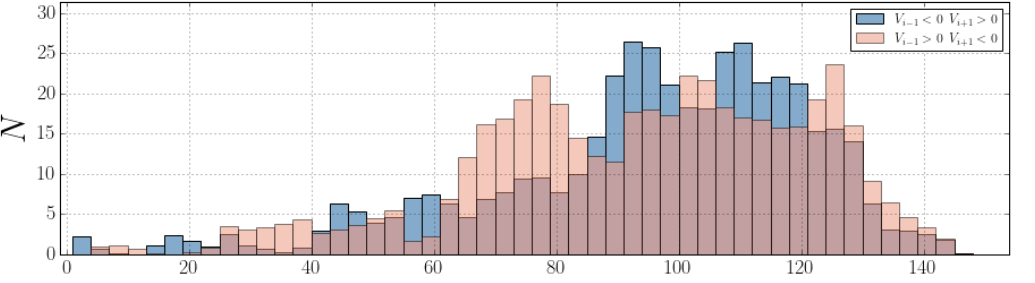

In [5]:
Image('./../methods/F-B method/results_images/NGC4254_hist_Ha.png',width=700)

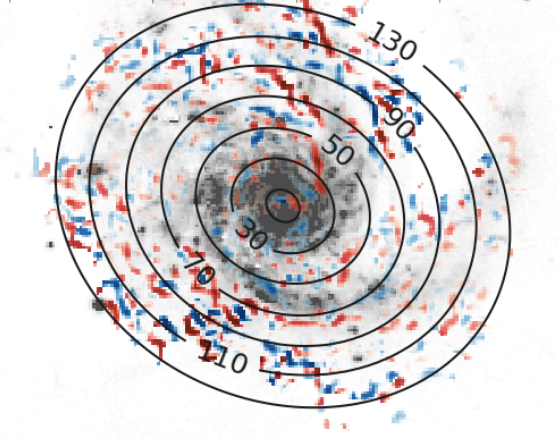

In [9]:
Image('./../methods/F-B method/results_images/NGC4254_map_Ha.png',width=500)

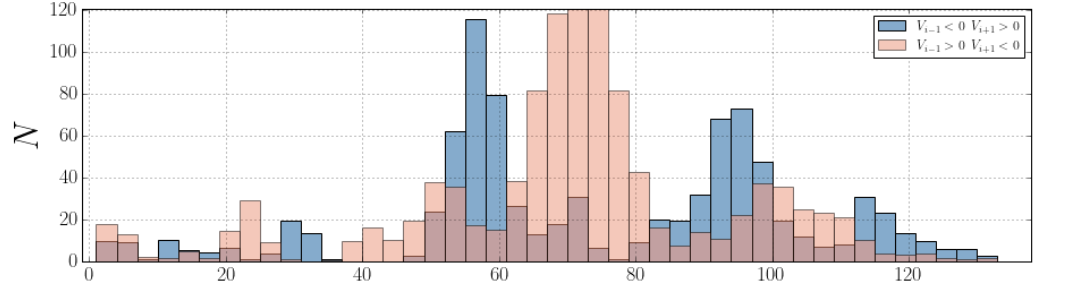

In [7]:
Image('./../methods/F-B method/results_images/NGC4254_hist_CO.png',width=700)

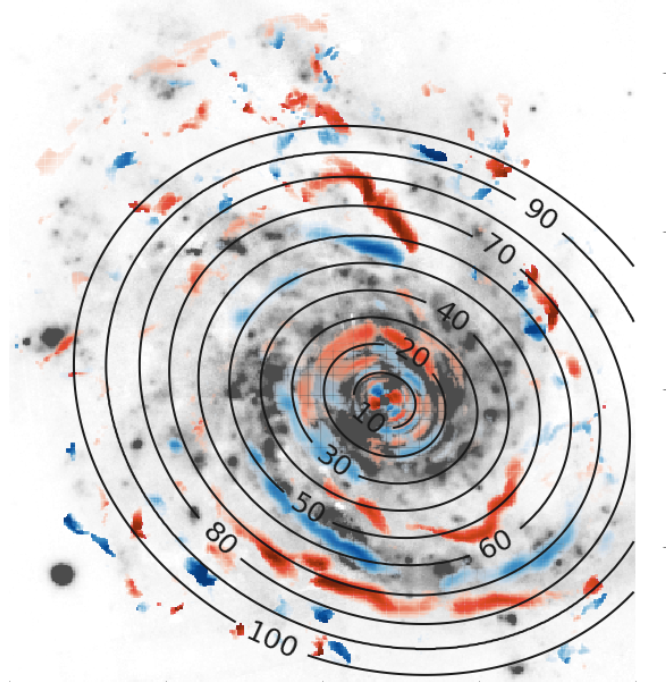

In [8]:
Image('./../methods/F-B method/results_images/NGC4254_map_CO.png',width=500)